In [8]:
from ia_model.data_preparation import load_data, prepare_data, scale_data, split_data
from ia_model.model import build_model, train_model, evaluate_model, save_model, load_trained_model
from ia_model.utils import ia_plot_history, load_scalers
import config as cfg
import joblib




Epoch 1/50

8616/8616 [==============================] - 99s 11ms/step - loss: 3.0281e-05 - val_loss: 1.0750e-05
Epoch 2/50
8616/8616 [==============================] - 91s 11ms/step - loss: 3.1434e-05 - val_loss: 1.0738e-05
Epoch 3/50
8616/8616 [==============================] - 93s 11ms/step - loss: 3.1350e-05 - val_loss: 1.0720e-05
Epoch 4/50
8616/8616 [==============================] - 91s 11ms/step - loss: 3.1387e-05 - val_loss: 1.0911e-05
Epoch 5/50
8616/8616 [==============================] - 94s 11ms/step - loss: 3.1413e-05 - val_loss: 1.0717e-05
Epoch 6/50
8616/8616 [==============================] - 95s 11ms/step - loss: 3.1359e-05 - val_loss: 1.0805e-05
Epoch 7/50
8616/8616 [==============================] - 93s 11ms/step - loss: 3.1427e-05 - val_loss: 1.1554e-05
Epoch 8/50
8616/8616 [==============================] - 91s 11ms/step - loss: 3.1380e-05 - val_loss: 1.0825e-05
Epoch 9/50
8616/8616 [==============================] - 90s 10ms/step - loss: 3.1380e-05 - val_loss: 

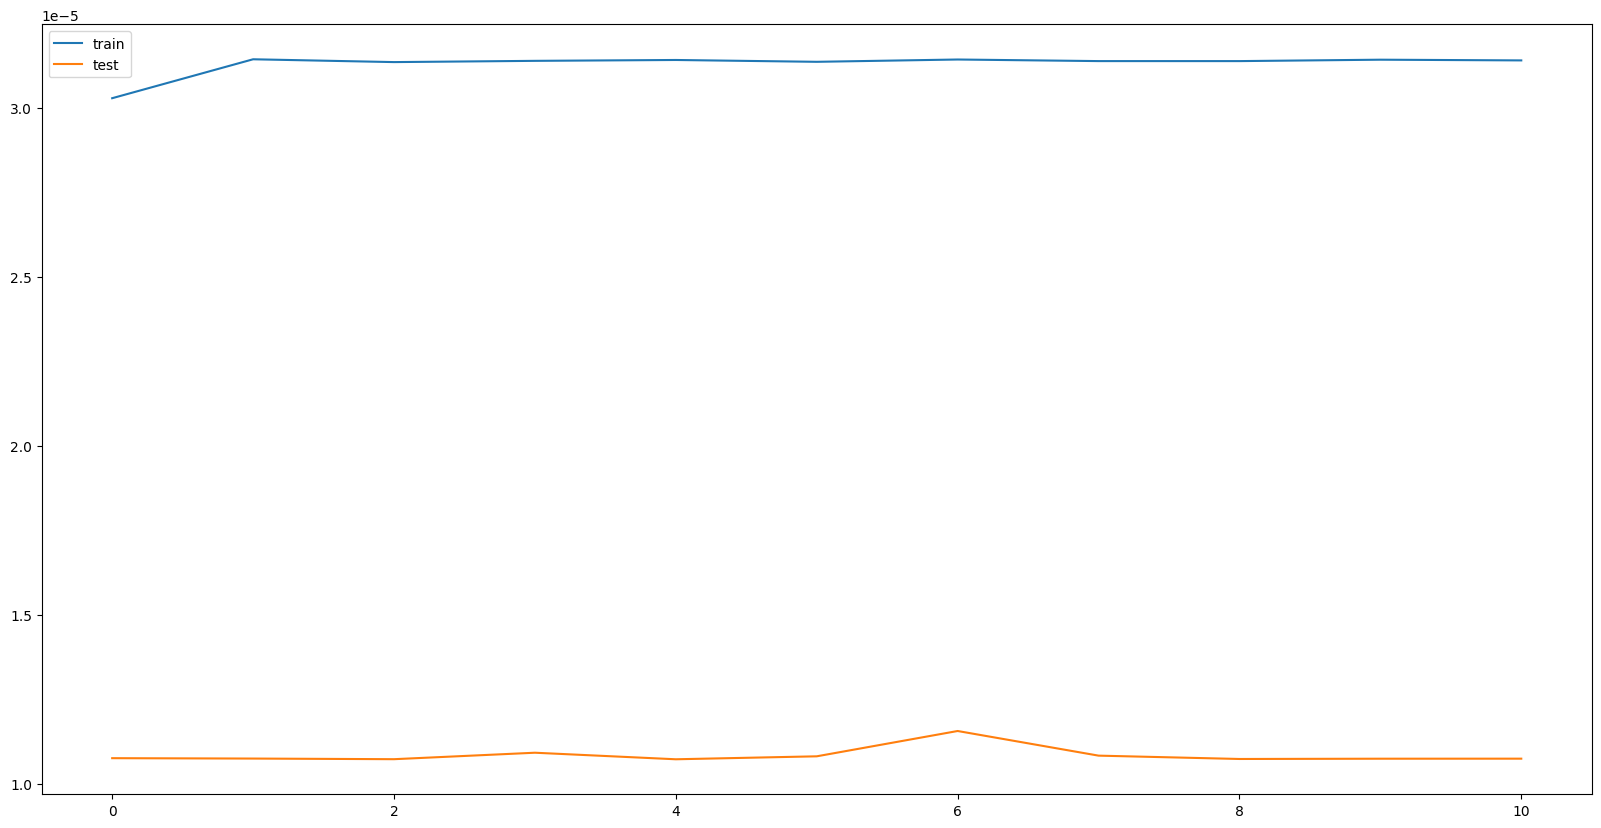

2020/2020 [==============================] - 8s 4ms/step
Mean Squared Error: 1.0749762119350052e-05, Mean Absolute Error: 0.0007635170632556415, R-Squared: -0.003046544392626638


In [6]:
df = load_data('aggregated_data2.csv')
X, y = prepare_data(df, cfg.FEATURE_COL, cfg.TARGET_COL, cfg.N_PAST)
X, y, scaler_X, scaler_Y = scale_data(X, y, save_scalers=True)
X_train, X_test, y_train, y_test = split_data(X, y)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = build_model((X_train.shape[1], 1))
model, history = train_model(model, X_train, y_train, X_test, y_test, cfg.EPOCHS, cfg.BATCH_SIZE)
ia_plot_history(history)

mse, mae, r2 = evaluate_model(model, X_test, y_test)
print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R-Squared: {r2}")



In [9]:
save_model(model, cfg.MODEL_PATH)
joblib.dump(scaler_X, 'scaler_X.pkl')  # Guardar el escalador X
joblib.dump(scaler_Y, 'scaler_Y.pkl')  # Guardar el escalador Y

['scaler_Y.pkl']